This is continuation of univariate logistic regression post. <br>
Since, this is a multivariate problem we deal with more than one feature (sepal length and sepal width) and a target vector of size 2 (setosa, versicolor)


In [1]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import linear_model

In [2]:
iris = datasets.load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [5]:
X = iris.data[:, :2]

y_bool = iris.target!=2

y = iris.target[y_bool]

X = X[y_bool]

In [6]:
y.shape, X.shape

((100,), (100, 2))

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

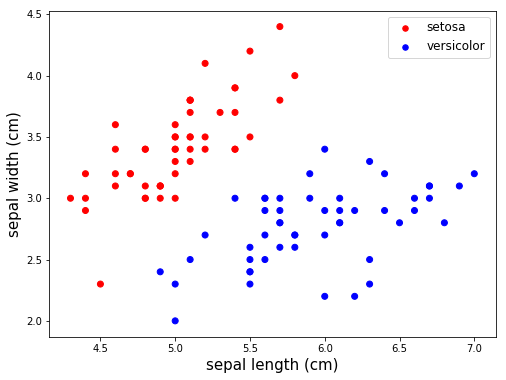

In [9]:
plt.figure(1,figsize=(8,6))
ax = plt.scatter(X[:,0],X[:,1],c=y, cmap="bwr_r")
plt.xlabel(iris.feature_names[0], fontsize=15)
plt.ylabel(iris.feature_names[1], fontsize=15)
s1 = plt.scatter([],[], s=30, marker='o', c='red' )
s2 = plt.scatter([],[], s=30, marker='o', c='blue')

plt.legend((s1,s2),
       (iris.target_names[0],iris.target_names[1]),
       scatterpoints=1,
       loc='upper right',
       fontsize=12,
           )
plt.show()

### Logistic Regression

In [10]:
X = np.c_[np.ones((X.shape[0],1)), X[:]]
y = y.reshape(-1,1)


# Parameters required for Gradient Descent
alpha = 0.1   #learning rate
m = y.size  #no. of samples
np.random.seed(10)
theta = np.random.rand(3)  #initializing theta with some random values
theta = theta.reshape(-1,1)

In [11]:
def gradient_descent(x, y, m, theta,  alpha):
    cost_list = []   #to record all cost values to this list
    theta_list = []  #to record all theta_0 and theta_1 values to this list 
    prediction_list = []
    run = True
    cost_list.append(1e10)    #we append some large value (initial value) to the cost list
    i=0
    while run:
        Z = np.dot(x, theta) 
        prediction = 1 / (1 + np.exp(-Z))   #predicted y values - sigmoid function
        prediction_list.append(prediction)
        error = prediction - y
        cost = np.sum(-(y * np.log(prediction) + (1 - y) * np.log(1 - prediction))) / m   #  (1/2m)*sum[(error)^2]
#         cost = -(1/m)*np.sum(np.dot(y.T, np.log(prediction)) + np.dot((1 - y).T, np.log(1 - prediction)))
        
        cost_list.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))   # alpha * (1/m) * sum[error*x]
        theta_list.append(theta)
        if cost_list[i]-cost_list[i+1] < 1e-8:   #checking if the change in cost function is less than 10^(-8)
            run = False

        i+=1
    cost_list.pop(0)   # Remove the large number we added in the begining 
    return prediction_list, cost_list, theta_list

In [12]:
%%time 
prediction_list, cost_list, theta_list = gradient_descent(X, y, m, theta, alpha)
theta = theta_list[-1]

CPU times: user 13 s, sys: 168 ms, total: 13.1 s
Wall time: 13.1 s


In [13]:
theta

array([[-35.64955432],
       [ 15.32854738],
       [-15.09050851]])

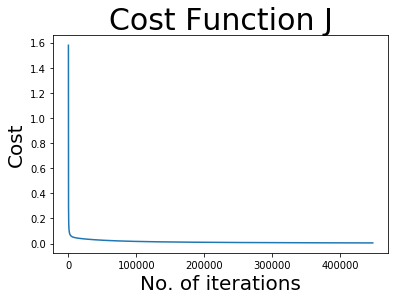

In [14]:
plt.title('Cost Function J', size = 30)
plt.xlabel('No. of iterations', size=20)
plt.ylabel('Cost', size=20)
plt.plot(cost_list)
plt.show()

In [15]:
xx = np.linspace(X.min(), X.max())

In [16]:
yy = - theta[1]/theta[2] *xx - theta[0]/theta[2]

In [17]:
X.shape

(100, 3)

In [18]:
X_setosa = X[:,1:][y.ravel()==0] 
X_versicolor = X[:,1:][y.ravel()==1]

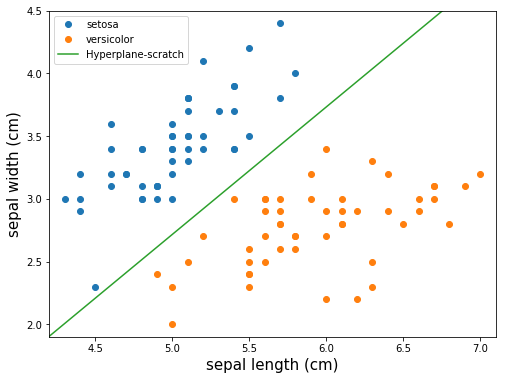

In [19]:
plt.figure(1,figsize=(8,6))
plt.plot(X_setosa[:,0], X_setosa[:,1],'o',label='setosa')
plt.plot(X_versicolor[:,0], X_versicolor[:,1],'o',label='versicolor')
plt.plot(xx,yy,label='Hyperplane-scratch')
plt.xlim(X[:,1].min()-0.1, X[:,1].max()+0.1)
plt.ylim(X[:,2].min()-0.1, X[:,2].max()+0.1)
plt.legend()
plt.xlabel(iris.feature_names[0], fontsize=15)
plt.ylabel(iris.feature_names[1], fontsize=15)
plt.show()

In [20]:
theta

array([[-35.64955432],
       [ 15.32854738],
       [-15.09050851]])

### sklearn

In [21]:
X_sklearn = iris.data[:, :2]

y_bool = iris.target!=2

y = iris.target[y_bool]

X_sklearn = X_sklearn[y_bool]

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr = LogisticRegression(C=1e100, penalty='l1', tol=1e-8, solver='liblinear')

#### Hyperparameters

C is the strength of the regularization, we use this to avoid over-fitting. <br>
Higher values of C correspond to less regularizatio. <br>
C is actually the Inverse of regularization strength(lambda)


By default sklearn.linear_model.LogisticRegression() uses C = 1


We kept convergence limit for residual $10^{-8}$ in the scratch code, so using same here 'tol'

Other hyperparameters, we discuss in detail in another post. 

In [24]:
lr = lr.fit(X_sklearn,y)

In [25]:
lr.coef_

array([[ 15.44383411, -14.36184745]])

In [26]:
lr.intercept_

array([-38.30771138])

In [27]:
yy_l1 = - lr.coef_[0,0]/lr.coef_[0,1] *xx - lr.intercept_[0]/lr.coef_[0,1]

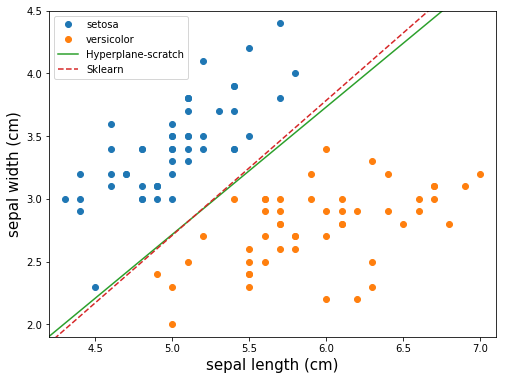

In [28]:
plt.figure(1,figsize=(8,6))
plt.plot(X_setosa[:,0], X_setosa[:,1],'o',label='setosa')
plt.plot(X_versicolor[:,0], X_versicolor[:,1],'o',label='versicolor')
plt.plot(xx,yy,label='Hyperplane-scratch')
plt.plot(xx,yy_l1,'--',label='Sklearn')
plt.xlim(X[:,1].min()-0.1, X[:,1].max()+0.1)
plt.ylim(X[:,2].min()-0.1, X[:,2].max()+0.1)
plt.legend()
plt.xlabel(iris.feature_names[0], fontsize=15)
plt.ylabel(iris.feature_names[1], fontsize=15)
plt.show()

#### Weights

From scratch

In [29]:
'Theta_0 and Theta_1 are {},{}'.format(round(theta[0,0],3),round(theta[1,0],3))

'Theta_0 and Theta_1 are -35.65,15.329'

Sklearn

In [30]:
'Theta_0 and Theta_1 are {},{}'.format(round(lr.intercept_[0],3), round(lr.coef_[0,0],3))

'Theta_0 and Theta_1 are -38.308,15.444'

Below cell for styling, ignore it

#### Prediction

We 'll try predicting using some sample length and width

In [31]:
test_data = [[5,3.5]]

In [32]:
iris.target_names[lr.predict(test_data)[0] ]

'setosa'